In [1]:
# imports
from Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings

2025-01-10 11:21:49.413960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 11:21:49.443678: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 11:21:49.451909: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 11:21:49.473859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 11:21:51.209009: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
1357,RF-SPUD,crx,skewed,0.3,"{'knn': 16, 'OD_method': 'default', 'agg_metho...",{'42': 0.7680722891566265},{'42': 0.0},{'42': 0.8041431261770244},{'42': 0.7218045112781954},{'42': 0.7293233082706767},{'42': 0.7297716340540793},{'42': 0.7237552772833739},"{'42': {'RF-OOB': 0.8361581920903954, 'KNN': 0...",{}
830,RF-SPUD,IstanbulStock,distort,0.3,"{'knn': 2, 'OD_method': 'absolute_distance', '...","{'42': -0.24094531824798326, '1738': -0.301797...","{'42': 0.005767570728447315, '1738': 0.0041003...","{'42': -0.03869192990299486, '1738': -0.050677...","{'42': -0.03052486054926451, '1738': -0.031642...","{'42': -0.09656078131132673, '1738': -0.001685...","{'42': 1.1714598418887054, '1738': 1.113487262...","{'42': 1.1356389707269812, '1738': 1.130014925...","{'42': {'RF-OOB': -0.043491886816361625, 'KNN'...",{}
126,SPUD,Hydrodynamics,even,0.3,"{'knn': 16, 'OD_method': 'default', 'agg_metho...",{'42': -0.031658477026315746},{'42': 0.009065609714960364},{'42': 0.10653917676577496},{'42': 0.0010329794726339214},{'42': -0.11620415217229763},{'42': 0.8494718784113319},{'42': 0.8036237528425513},"{'42': {'RF-OOB': 0.12862737027579185, 'KNN': ...","{'knn': 0.08249354644832466, 'OD_method': 0.00..."
21,RF-MASH,ComputerHardware,even,0.3,"{'knn': 2, 'page_rank': 'None', 'DTM': 'hellin...",{'42': 0.6610027210767668},{'42': 0.06830200773791809},{'42': 0.6748312056467367},{'42': 0.6060975885462144},{'42': 0.6365158515067435},{'42': 0.8457885906911036},{'42': 0.880467650676343},"{'42': {'RF-OOB': 0.5946161518441566, 'KNN': 0...","{'connection_limit': 0.010561970839001273, 'th..."
123,SPUD,Hydrodynamics,turn,0.3,"{'knn': 9, 'OD_method': 'default', 'agg_method...","{'42': 0.2867401297553088, '1738': 0.286740129...","{'42': 0.0002635351661325687, '1738': 0.000263...","{'42': 0.6535745793558708, '1738': 0.663594311...","{'42': 0.7251040677491007, '1738': 0.565126383...","{'42': 0.49206735290855597, '1738': 0.33037572...","{'42': 0.573033818416981, '1738': 0.8911301839...","{'42': 0.4215618930632572, '1738': 0.718136644...","{'42': {'RF-OOB': 0.5035530121537326, 'KNN': 0...","{'knn': 0.3824077272825893, 'OD_method': 0.014..."


In [ ]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('RF-SPUD', 'iris', 'random', {'knn': 14, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

Full Embedding Complete
Partial Embedding Complete
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
GRAE Embedding Complete


240 300 300


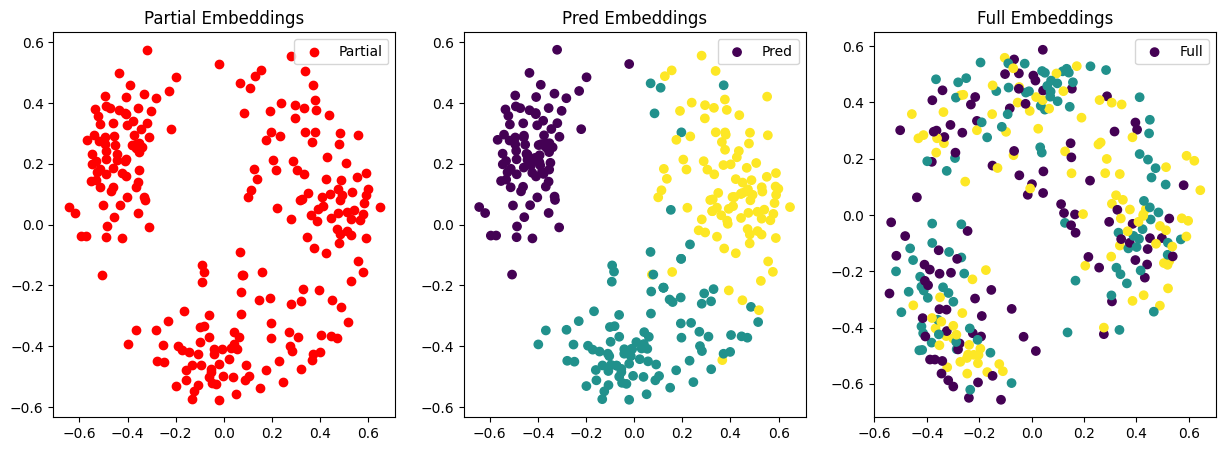

In [7]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

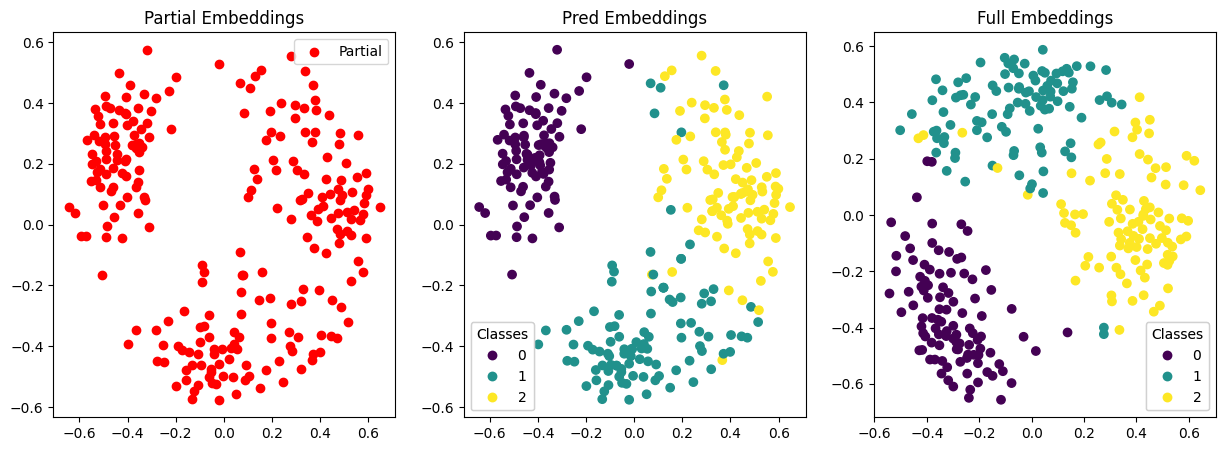

In [15]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

# Marshall's Tests here?

# Marshall's Vizualizations Here?